In [48]:
import numpy as np
from matplotlib.pyplot import plot
from math import e

In [49]:
RESISTOR = 10               # Ohm
COIL = 1 * 10**-3           # Henry
VOLTAGE_START = 300         # Volt
CURRENT_START = 10          # Ampere
DUTY_CYCLE = 20 * 10**-2    # /100 %
PULSE_WIDTH = 5 * 10**-3    # seconds
SCANS = 12

VOLTAGE = [0, VOLTAGE_START, 0]

def current(voltage_start, time):
    return voltage_start/RESISTOR + (CURRENT_START - voltage_start/RESISTOR) * e**(- time * RESISTOR / COIL)

In [50]:
SCANS_DOWN_PARTIAL = round((1-DUTY_CYCLE) / 2 * (SCANS - 1))
SCANS_UP = (SCANS - 1) - SCANS_DOWN_PARTIAL * 2

TIME_UP = PULSE_WIDTH * DUTY_CYCLE
TIME_DOWN_PARTIAL = PULSE_WIDTH - TIME_UP

DELTA_TIME_DOWN = TIME_DOWN_PARTIAL / SCANS_DOWN_PARTIAL
DELTA_TIME_UP = TIME_UP / SCANS_UP


time_points_down_firstpart = np.arange(0, TIME_DOWN_PARTIAL + DELTA_TIME_DOWN, DELTA_TIME_DOWN)
time_points_up = np.arange(max(time_points_down_firstpart) + DELTA_TIME_UP, max(time_points_down_firstpart)+ TIME_UP + DELTA_TIME_UP, DELTA_TIME_UP)
time_points_down_secondpart = np.arange(max(time_points_up) + DELTA_TIME_DOWN, max(time_points_up) + TIME_DOWN_PARTIAL + DELTA_TIME_DOWN, DELTA_TIME_DOWN)

time = [*time_points_down_firstpart, *time_points_up, *time_points_down_secondpart]

current_down_firstpart = [current(VOLTAGE[0], time) for time in np.nditer(time_points_down_firstpart)]
current_up = [current(VOLTAGE[1], time) for time in np.nditer(time_points_up)]
current_down_secondpart = [current(VOLTAGE[2], time) for time in np.nditer(time_points_down_secondpart)]

current = current_down_firstpart + current_up + current_down_secondpart

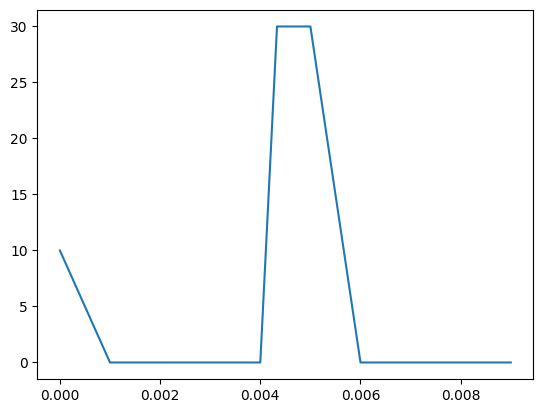

In [53]:
# plot(time,current, drawstyle="steps-post")
plot(time,current)

# !!! Lösung: baker